In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
##importing the data
df = pd.read_csv("dash.csv")
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#checking the data types
df.dtypes

Unnamed: 0          int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
#drop unnamed column
df.drop(columns=["Unnamed: 0"], inplace=True)


In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
#replace all education category with the term 'basic.' with basic and unknown with illeterate
df['education'].replace({'basic.4y':'basic','basic.6y':'basic','basic.9y':'basic','unknown':'illiterate'},inplace=True)

In [8]:
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
illiterate              1749
Name: education, dtype: int64

In [9]:
#replace self-employed with entrepreneur and unknown with unemployed in the jb coumns
df['job'].replace({'self-employed':'entrepreneur','unknown':'unemployed'},inplace=True)

In [10]:
df['job'].value_counts()

admin.          10422
blue-collar      9254
technician       6743
services         3969
management       2924
entrepreneur     2877
retired          1720
unemployed       1344
housemaid        1060
student           875
Name: job, dtype: int64

# Preprocessing

## Binary Encoding


Here we perform Binary Encoding on all the categorical columns to make them numerical values

In [11]:
#creating a new column subscription where in column y  yes =1 and no=0
df['subscription']=np.where(df.y=='yes',1,0)
#binary encoding
df=pd.get_dummies(df,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week',
                             'poutcome'])
#replacing the y column wth the subscription column
df=df.drop(['y'],axis=1)
##reorder colums
columns=[column for column in df.columns if column !='subscription']
columns=columns +['subscription']
df=df[columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

## One hot Encoding

Encoding all the categorical values using One Hot Encoding

In [12]:
##Preprocessing
from Data import one_hot_encoder

In [13]:
# df, cat_cols = one_hot_encoder(df, nan_as_category=True)


In [14]:
# df.dtypes

In [15]:
# df.head()

## Handling Outliers

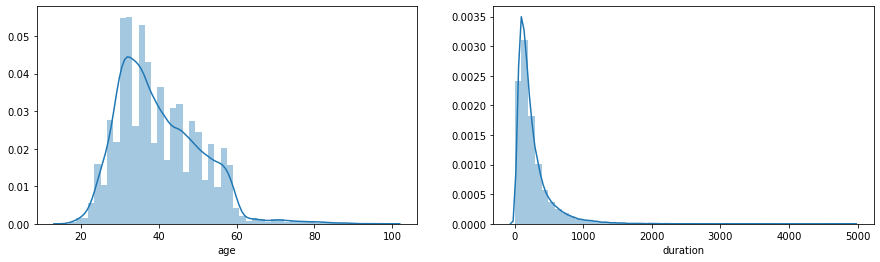

<Figure size 432x360 with 0 Axes>

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["age"],ax=axis1)
sns.distplot(df["duration"],ax=axis2)

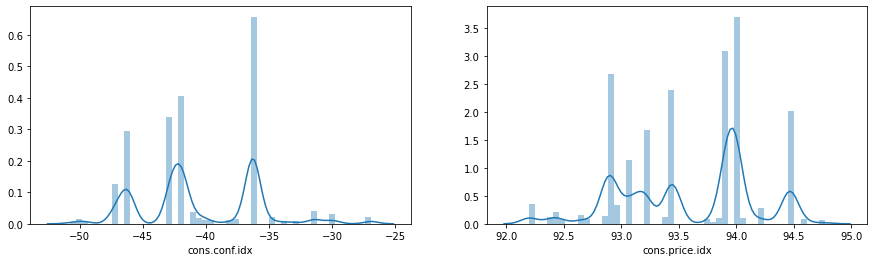

<Figure size 432x360 with 0 Axes>

In [17]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["cons.conf.idx"],ax=axis1)
sns.distplot(df["cons.price.idx"],ax=axis2)

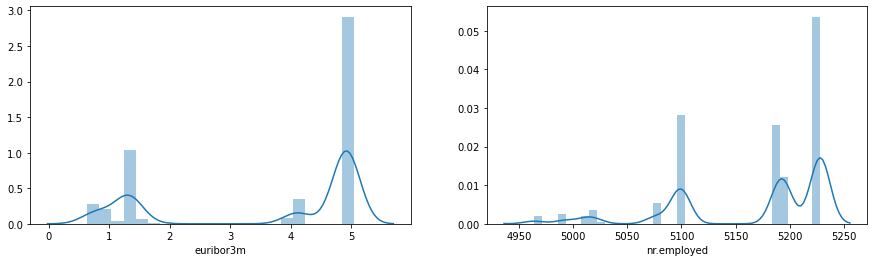

<Figure size 432x360 with 0 Axes>

In [18]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["euribor3m"],ax=axis1)
sns.distplot(df["nr.employed"],ax=axis2)

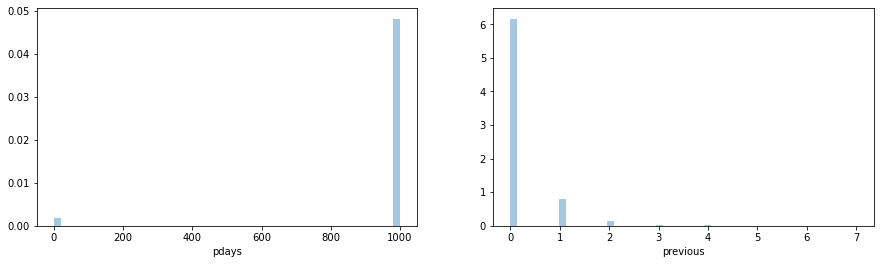

<Figure size 432x360 with 0 Axes>

In [19]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

plt.figure(figsize=(6,5))
sns.distplot(df["pdays"],ax=axis1)
sns.distplot(df["previous"],ax=axis2)

Capping outliers- age at 80 and duration at 2000,

In [20]:
df["age"]=df["age"].apply(lambda x: 80 if x>80 else x)
df["duration"]=df["duration"].apply(lambda y: 2000 if y>2000 else y)
print(max(df["age"]))
print(max(df["duration"]))

80
2000


## Rescaling using StandardScaler

In [21]:
#rescaling all numerical columns
from Data import scaler

In [22]:
df1=scaler(df)

In [23]:
df1["avg_age_conf_idx"] = df1.groupby('cons.conf.idx')["age"].transform('mean')


In [24]:
df1.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscription,avg_age_conf_idx
0,1.543387,0.014306,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-0.356309,0.030683
1,1.639907,-0.431642,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-0.356309,0.030683
2,-0.290495,-0.125053,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-0.356309,0.030683
3,-0.000935,-0.423679,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-0.356309,0.030683
4,1.543387,0.197463,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857,-0.356309,0.030683


## PCA Dimensionality Reduction

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
principalDf

,principal component 1,principal component 2
0,-2.172141,2.184171
1,-2.589959,2.314419
2,-1.752592,0.452378
3,-1.960839,1.087846
4,-1.919775,0.953824
...,...,...
41183,2.307329,1.061789
41184,1.306396,0.823722
41185,1.898187,0.279798
41186,1.976079,-0.181361


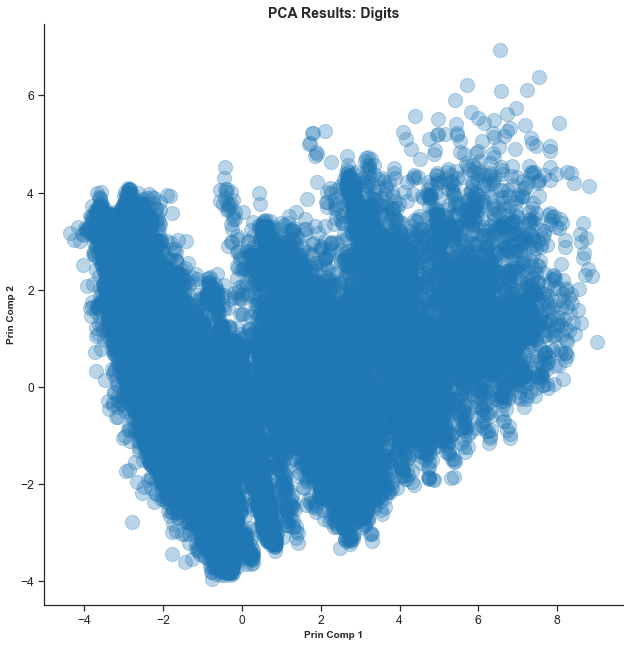

In [27]:
# Plot Digits PCA

# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='principal component 1',
           y='principal component 2',
           data=principalDf,
           fit_reg=False,
           legend=True,
           size=9,
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

## TSNE Dimensionality Reduction

In [28]:
df1.shape

(41188, 60)

In [29]:
data_X = df1.head(77)
# y = digits.target[:600]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [30]:
tsne_obj= tsne.fit_transform(data_X)

In [31]:
tsne_obj

array([[ 3.16311340e+01, -1.68404980e+01],
       [-2.80768299e+01, -1.10130739e+01],
       [ 1.18717880e+01,  2.40932446e+01],
       [-2.56828260e+00,  1.23540611e+01],
       [ 1.43509474e+01,  1.35427160e+01],
       [-2.31140041e+01, -1.16884642e+01],
       [-8.58821678e+00,  2.02847939e+01],
       [-3.00039825e+01,  2.72527237e+01],
       [ 2.72276173e+01,  8.36066341e+00],
       [ 1.81131725e+01,  2.51641750e+01],
       [-2.68943062e+01,  2.43868961e+01],
       [ 1.95131016e+01,  2.11326370e+01],
       [ 2.11952286e+01, -5.39585924e+00],
       [ 2.96435547e+01, -2.08467236e+01],
       [-2.93968821e+00, -7.06023741e+00],
       [ 1.22647772e+01, -2.55077667e+01],
       [ 1.33532357e+00, -5.84694242e+00],
       [ 1.06127901e+01, -1.90138130e+01],
       [ 1.21020842e+01, -1.19470272e+01],
       [-1.45179224e+01, -2.45131016e+01],
       [-6.94290400e-01,  2.99551048e+01],
       [-9.99979019e+00, -1.26650000e+01],
       [ 2.84315281e+01,  2.06625214e+01],
       [ 2.

In [32]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        })

In [33]:
tsne_df.head()

,X,Y
0,31.631134,-16.840498
1,-28.076830,-11.013074
2,11.871788,24.093245
3,-2.568283,12.354061
4,14.350947,13.542716


Text(0.5, 1.0, 'TSNE-Visualizing high dimensional data')

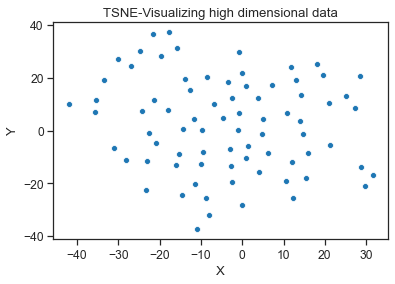

In [34]:
sns.scatterplot(x="X", y="Y",
              data=tsne_df);
plt.title("TSNE-Visualizing high dimensional data")

## Train Test Split

In [35]:
y=df.subscription
X=df.drop('subscription',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
4927,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,...,0,0,0,0,0,0,1,0,1,0
15938,37,1134,5,999,0,1.4,93.918,-42.7,4.960,5228.1,...,0,0,0,1,0,0,0,0,1,0
37647,33,147,1,999,1,-2.9,92.201,-31.4,0.859,5076.2,...,0,0,0,0,0,1,0,1,0,0
27423,57,56,2,999,1,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,1,0,0
8659,50,144,1,999,0,1.4,94.465,-41.8,4.864,5228.1,...,0,0,0,0,0,0,1,0,1,0


# Modelling

Creating our models to predict number os subscriptions using K-Fold Cross Validation. We will use accuracy score to evaluate the performance of our models.
 * Linear Regression Model
 * MLP Classifier
 * Decision Tree Classifier

In [36]:
#importing our KFold model
from model import modelKfold

In [37]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [38]:
#using KFold cross validation to calulate the accuracy scores of our models

logReg=LogisticRegression()
mlp=MLPClassifier()
dectree=DecisionTreeClassifier()

# xGradientTrained,xgScores=modelKfold(xGradient, X_train_refined1,Y_train_refined1)
logRegTrained,lrScores=modelKfold(logReg, X_train,y_train,X_train)
mlpTrained,mlScores=modelKfold(mlp, X_train,y_train,X_train)
decTreeTrained,dtScores=modelKfold(dectree, X_train,y_train,X_train)

print("MLP Classifier scores")
print('\n'.join('{}:{}'.format(*k)for k in enumerate(mlScores)))
print("Decission Tree Classifier scores")
print('\n'.join('{}:{}'.format(*k)for k in enumerate(dtScores)))

MLP Classifier scores
0:0.8672781224710008
1:0.8541947666576747
2:0.9103048287024548
3:0.8925006743997842
4:0.883717793066235
Decission Tree Classifier scores
0:0.8885891556514702
1:0.8888589155651471
2:0.887240356083086
3:0.8907472349608848
4:0.8842573856738163


### Logistic Regression for Predictions

In [39]:
#import our predictor function
from model import predictor

#logistic regression predictions
predictor(logReg,X_test,y_test)

0    3847
1     272
Name: predicted, dtype: int64

In [40]:
# #using logistic regression to predict the number of subscriptions
y_pred=logReg.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df2['Predicted'].value_counts()


0    3847
1     272
Name: Predicted, dtype: int64

#### Mean Squared Error

In [41]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from model import evaluate_model
evaluate_model(mean_squared_error,logReg,X_test,y_test)

0.09176984705025491

### MLP Classifier to Make Predictions

In [42]:
#mlp classifier predictions
predictor(mlp,X_test,y_test)


0    4110
1       9
Name: predicted, dtype: int64

In [43]:
#evaluate the MLP Classifier model
evaluate_model(roc_auc_score,mlp,X_test,y_test)

0.5058907724495233

### Decission tree to Make Predictions

In [44]:
#decision tree classifier predictions
predictor(dectree,X_test,y_test)


0    3653
1     466
Name: predicted, dtype: int64

In [45]:
#evaluate our decision tree model
evaluate_model(roc_auc_score,dectree,X_test,y_test)

0.7127687610866472

## Stratified k-fold

In [ ]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score of the Logistic Regression Model:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(X_test)[:,1]
    pred_test_full +=pred_test
    i+=1

1 of KFold 5
ROC AUC score of the Logistic Regression Model: 0.6770528680598142
2 of KFold 5
